In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/malaria-dataset/reported_numbers.csv
/kaggle/input/malaria-dataset/incidence_per_1000_pop_at_risk.csv
/kaggle/input/malaria-dataset/estimated_numbers.csv


In [5]:
reported=pd.read_csv('../input/malaria-dataset/reported_numbers.csv')
reported.head(10)

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
3,Argentina,2017,0.0,1.0,Americas
4,Armenia,2017,0.0,NaN,Europe
5,Azerbaijan,2017,0.0,NaN,Europe
6,Bangladesh,2017,4893.0,13.0,South-East Asia
7,Belize,2017,7.0,0.0,Americas
8,Benin,2017,1573163.0,2182.0,Africa
9,Bhutan,2017,24.0,1.0,South-East Asia


In [10]:
reported.describe()

,Year,No. of cases,No. of deaths
count,1944.000000,1.710000e+03,1675.000000
mean,2008.500000,3.897303e+05,1289.413731
std,5.189462,1.270270e+06,4290.739997
min,2000.000000,0.000000e+00,0.000000
25%,2004.000000,5.937500e+02,1.000000
50%,2008.500000,1.479200e+04,30.000000
75%,2013.000000,1.170978e+05,669.500000
max,2017.000000,1.533084e+07,51842.000000


In [15]:
reported.columns

Index(['Country', 'Year', 'No. of cases', 'No. of deaths', 'WHO Region'], dtype='object')

**There are 234 nan values**

In [18]:
reported['No. of cases'].isna().sum()

234

In [21]:
reported['No. of deaths'].isna().sum()

269

Total nan values in whole dataset

In [20]:
num_nans = reported.size - reported.count().sum()
num_nans

503

**How to drop**

In [48]:
df=reported.dropna()

**Check if there is any null rows?**

In [49]:
df.isnull().any().any()

False

Lets see some graphical representations

In [26]:
import matplotlib.pyplot as plt
import numpy as np

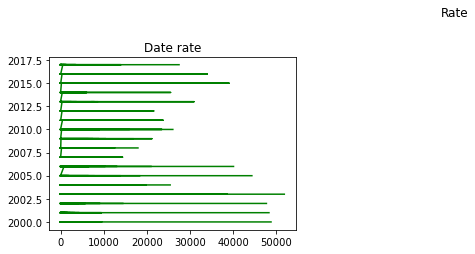

In [31]:

fig=plt.figure(figsize=(15,7))
fig.suptitle('Rate')
ax2=fig.add_subplot(231)
ax2.set_title('Date rate')

ax2.plot(reported['No. of deaths'],reported['Year'],color='green')


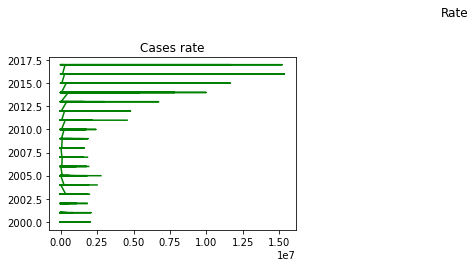

In [33]:
fig=plt.figure(figsize=(15,7))
fig.suptitle('Rate')
ax2=fig.add_subplot(231)
ax2.set_title('Cases rate')

ax2.plot(reported['No. of cases'],reported['Year'],color='green')


In [39]:
x=reported['Year']
y=np.vstack([reported['No. of deaths']])

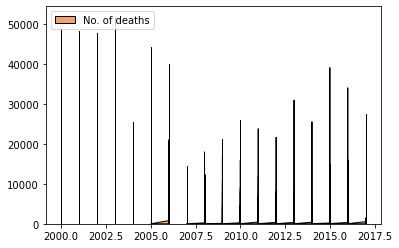

In [40]:
labels=['No. of deaths']
colors=['sandybrown']
plt.stackplot(x,y,labels=labels,colors=colors,edgecolor='black')
plt.legend(loc=2)
plt.show()

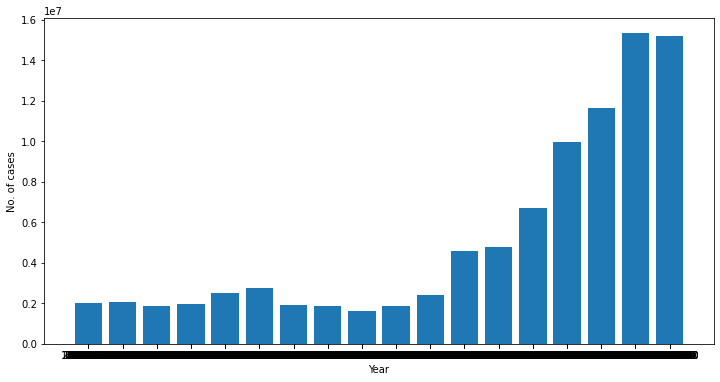

In [43]:
plt.figure(figsize=(12,6))
x=reported['Year']
plt.bar(x,reported['No. of cases'])
plt.xticks(x,reported['No. of cases'])
plt.xlabel('Year')
plt.ylabel('No. of cases')
plt.show()


**Transforming features**

In [64]:
from sklearn.preprocessing import FunctionTransformer


In [68]:
def add_twenty(x):
    return x+20
features=reported['No. of cases']

In [69]:
transformer=FunctionTransformer(add_twenty)
transformer.transform(features)

0        161798.0
1            20.0
2       3874912.0
3            20.0
4            20.0
          ...    
1939      29756.0
1940      74336.0
1941    1394515.0
1942          NaN
1943          NaN
Name: No. of cases, Length: 1944, dtype: float64